In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
pip install requests

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'C:\Users\AZUZ\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [7]:
import requests
requests.__version__

'2.25.1'

In [8]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55fd565afc65bd1cff73756cb209c91a


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=55fd565afc65bd1cff73756cb209c91a&q=Boston


In [11]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":68.76,"feels_like":69.37,"temp_min":63.05,"temp_max":73.51,"pressure":1011,"humidity":86},"visibility":10000,"wind":{"speed":5.01,"deg":299,"gust":11.99},"clouds":{"all":75},"dt":1622851522,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1622797730,"sunset":1622852203},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [13]:
# Get the JSON text of the 'Get' request.
boston_data = city_weather.json()
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 68.76,
  'feels_like': 69.37,
  'temp_min': 63.05,
  'temp_max': 73.51,
  'pressure': 1011,
  'humidity': 86},
 'visibility': 10000,
 'wind': {'speed': 5.01, 'deg': 299, 'gust': 11.99},
 'clouds': {'all': 75},
 'dt': 1622851522,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1622797730,
  'sunset': 1622852203},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 73.51 86 75 5.01


In [15]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-06-05 00:05:22'

In [16]:
city_data = []

In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [20]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

rocessing Record 17 of Set 16 | senno
Processing Record 18 of Set 16 | labuhan
Processing Record 19 of Set 16 | altay
Processing Record 20 of Set 16 | cockburn town
Processing Record 21 of Set 16 | dumka
Processing Record 22 of Set 16 | kushima
Processing Record 23 of Set 16 | ullapool
Processing Record 24 of Set 16 | mitu
Processing Record 25 of Set 16 | general roca
Processing Record 26 of Set 16 | riyadh
Processing Record 27 of Set 16 | dodge city
Processing Record 28 of Set 16 | sabha
Processing Record 29 of Set 16 | russell
Processing Record 30 of Set 16 | faanui
Processing Record 31 of Set 16 | elat
Processing Record 32 of Set 16 | ozgon
City not found. Skipping...
Processing Record 33 of Set 16 | stoyba
City not found. Skipping...
Processing Record 34 of Set 16 | novaya zaimka
Processing Record 35 of Set 16 | hasaki
Processing Record 36 of Set 16 | thunder bay
Processing Record 37 of Set 16 | emerald
Processing Record 38 of Set 16 | illoqqortoormiut
City not found. Skipping...
P

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Harper,4.3750,-7.7169,79.83,84,82,7.83,LR,2021-06-05 00:06:23
1,Khatanga,71.9667,102.5000,33.67,93,100,12.01,RU,2021-06-05 00:06:23
2,Burnie,-41.0667,145.9167,51.98,79,89,17.18,AU,2021-06-05 00:06:23
3,Hamilton,39.1834,-84.5333,83.03,56,1,5.06,US,2021-06-05 00:06:24
4,Cabo San Lucas,22.8909,-109.9124,95.81,27,1,13.80,MX,2021-06-05 00:06:24
5,Kodiak,57.7900,-152.4072,54.91,62,75,9.22,US,2021-06-05 00:06:24
6,Nikolskoye,59.7035,30.7861,53.49,77,2,1.70,RU,2021-06-05 00:06:24
7,Santa Cruz,-17.8000,-63.1667,76.46,83,40,13.22,BO,2021-06-05 00:06:25
8,Mataura,-46.1927,168.8643,49.48,70,100,5.82,NZ,2021-06-05 00:06:25
9,Ellisras,-23.6649,27.7443,46.63,54,3,5.82,ZA,2021-06-05 00:06:25


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Harper,LR,2021-06-05 00:06:23,4.3750,-7.7169,79.83,84,82,7.83
1,Khatanga,RU,2021-06-05 00:06:23,71.9667,102.5000,33.67,93,100,12.01
2,Burnie,AU,2021-06-05 00:06:23,-41.0667,145.9167,51.98,79,89,17.18
3,Hamilton,US,2021-06-05 00:06:24,39.1834,-84.5333,83.03,56,1,5.06
4,Cabo San Lucas,MX,2021-06-05 00:06:24,22.8909,-109.9124,95.81,27,1,13.80
5,Kodiak,US,2021-06-05 00:06:24,57.7900,-152.4072,54.91,62,75,9.22
6,Nikolskoye,RU,2021-06-05 00:06:24,59.7035,30.7861,53.49,77,2,1.70
7,Santa Cruz,BO,2021-06-05 00:06:25,-17.8000,-63.1667,76.46,83,40,13.22
8,Mataura,NZ,2021-06-05 00:06:25,-46.1927,168.8643,49.48,70,100,5.82
9,Ellisras,ZA,2021-06-05 00:06:25,-23.6649,27.7443,46.63,54,3,5.82


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1622903503.6522112

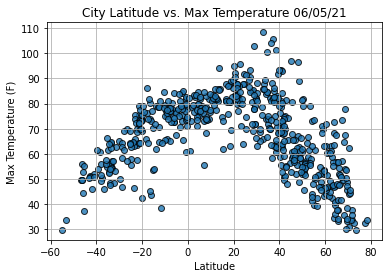

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

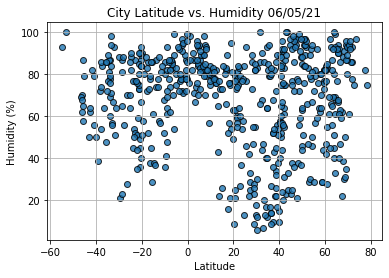

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

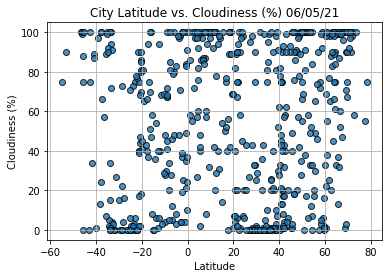

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

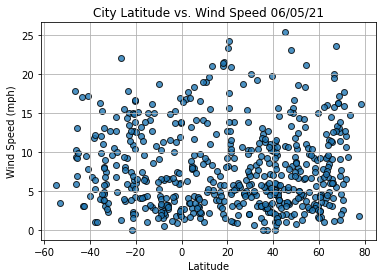

In [29]:

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [54]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [55]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

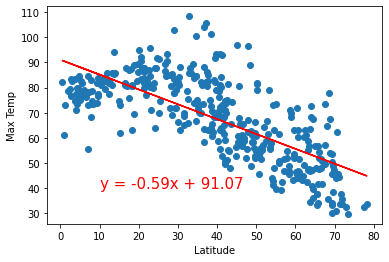

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

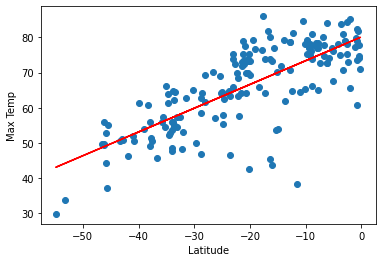

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))